### TP 1 : MLP
- Nom : ALLIOUI
- Prenom : Lounes
- Numéro etudiant : 28612361

In [347]:
import numpy as np
import matplotlib.pyplot as plt

In [348]:
def generate_data_3classes(n1,n2,n3, display=True):
    X1 = np.random.randn(n1,2)*0.15 - np.array([0.2 , 0.2])
    X2 = np.random.randn(n2,2)*0.25 + np.array([0.1 , 0.5])
    X3 = np.random.randn(n3,2)*0.15 + np.array([0.6 , 0.2])
    X = np.concatenate((X1,X2,X3), axis=0)
    Y = np.concatenate([np.ones(n1), np.ones(n2)*2, np.ones(n3)*3])-1

    if display:
        plt.plot(X1[:,0], X1[:,1], '.r')
        plt.plot(X2[:,0], X2[:,1], '.g')
        plt.plot(X3[:,0], X3[:,1], '.b')
        plt.show()

    return X,Y

#Converts a class vector (integers) to binary class matrix (copy from keras)
def to_categorical(y, num_classes=None, dtype="float32"):
    y = np.array(y, dtype="int")
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=dtype)
    categorical[np.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = np.reshape(categorical, output_shape)
    return categorical

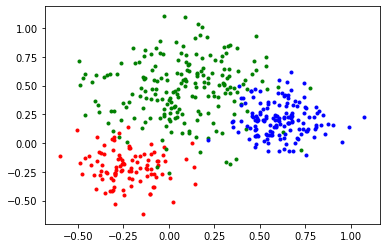

In [349]:
X_train, Y_train = generate_data_3classes(100, 200, 150)
Y_cat = to_categorical(Y_train)

K = Y_cat.shape[1] #nombre de classes
num_examples , D = X_train.shape # nombre d'exemples et dimension des exemples

In [350]:
# fonction sigmoide
def sigmo(v):
	return 1.0 / (1.0 + np.exp(-v))

# dérivée de la fonction sigmoide
def sigmop(v):
	return v * (1.0 - v)

In [351]:
# initialisation aléatoire des poids
W = 1 * np.random.normal(size=(D,K)) # D = 2, K = 3
b = np.zeros((1,K))

# paramètres de l'apprentissage
step_size = 1e-1
num_iter = 10000

In [352]:
# Apprenttissage du réseau
X = X_train
Y = Y_train


for i in range(num_iter):
    #propagation
    Z = np.dot(X, W) + b
    A = sigmo(Z)
    err = A - Y_cat
    
    loss = 1/len(Y) * np.sum(err**2) 
    if i % 1000 == 0:   
        print('iteration {}: loss {}'.format(i, loss))

    #retro-propagation

    dL_W = 2 * np.dot( X.T, err*sigmop(A))
    dL_b = 2 * np.sum(err*sigmop(A), axis= 0)

    W += -step_size * dL_W
    b += -step_size * dL_b


iteration 0: loss 0.7336836659682495
iteration 1000: loss 0.12885557287975713
iteration 2000: loss 0.1286842840520976
iteration 3000: loss 0.1286362889980591
iteration 4000: loss 0.12861635367086668
iteration 5000: loss 0.12860666384502148
iteration 6000: loss 0.128601530406757
iteration 7000: loss 0.1285986588408717
iteration 8000: loss 0.1285969920956417
iteration 9000: loss 0.1285959989494445


In [353]:
# calcul de la précision
Y_pred = A
class_pred = np.argmax(Y_pred, axis= 1)
print('Training accuracy: {:.2}'.format(np.mean(class_pred == Y_train)))

Training accuracy: 0.93


#### Remarque :
- On a realisé un reseau de neurones avec seulement une couche et 3 neurones. 
- Avec une seule couche on arrive à atteindre 93% d'accuracy sur la base de données de 450 elements.


Pour aller plus loin : 
- code d'évaluation des performances (et de visualisation)
- création d'un jeu de test indépendant (performance en généralisation)
- ajouter une couche cachée (observer les gains en performance et les frontières de décision)


#### Couche cachée, Evaluation des performance et jeu de test

Pour développer un réseau de neurones a 2 couches, il faut commencer par initialiser les paramètres du modèle, puis utiliser la fonction de Forward propagation, la back-propagation, et mettre a jour les paramètres du modèle. En répétant ces étapes en boucle avec l'algorithme de la descente de gradients, on peut engrainer notre réseau de neurones a apprendre des taches complexes.

Le perceptron multicouche (PMC) est la deuxième grande famille de réseaux de neurones. Après avoir décrit l'architecture de ces réseaux on va aborder leur apprentissage, et le concept de rétropropagation de l'erreur. Il est en plus est capable d'approximer des fonctions de forme très différente.

In [354]:
# Model evaluation 
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [355]:
#Generer les memes données
X, Y = generate_data_3classes(100, 200, 150,False)

#Split en test et train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.T
X_test = X_test.T

#To_categorical et reshape
Y_cat = to_categorical(Y_train)
Y_cat_test = to_categorical(Y_test)
Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_test = Y_test.reshape((1, Y_test.shape[0]))

K = Y_cat.shape[1] #nombre de classes
D, m = X_train.shape # dimension des exemples et nombre d'exemples

# initialisation aléatoire des poids avec une couche cachée de 32 neurones
np.random.seed(0)
W1 = 1 * np.random.normal(size=(32,D)) # D = 2, K = 3
b1 = np.zeros((32,1))
W2 = 1 * np.random.normal(size=(K,32)) # D = 2, K = 3
b2 = np.zeros((K,1))

# paramètres de l'apprentissage
step_size = 1e-2
num_iter = 10000

In [356]:
# Apprenttissage du réseau
train_loss = []
train_acc = []
history = []

for i in tqdm(range(num_iter)):
    #propagation
    Z1 = W1.dot(X_train) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    #retro-propagation
    dZ2 = A2 - Y_cat.T
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X_train.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)
    
    #Mise à jour des weights
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2

    # Remplit le vecteur de loss et acc
    train_loss.append(1/m * np.sum(dZ2**2) )
    class_pred = np.argmax(A2, axis= 0)
    train_acc.append(np.mean(class_pred == Y_train))

100%|██████████| 10000/10000 [00:08<00:00, 1125.57it/s]


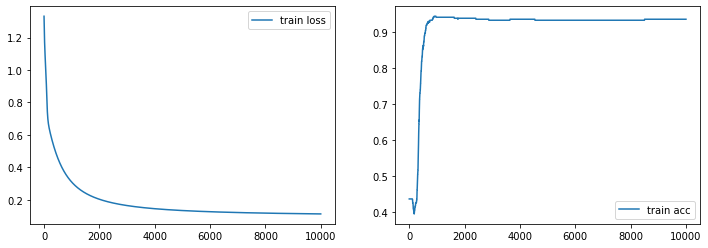

In [357]:
# Plot Loss et Acc
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='train loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='train acc')
plt.legend()
plt.show()

#### Remarques 
- Tout en gardant les memes parametres que l'exemple precedant : 
- Avec deux couches on arrive à un accuracy plus grand que le 1er exemple d'un seul couche
- On arrive à atteindre un loss plus bas.

Le probleme qui reste à verifier : Est ce que notre modele n'est dans le surApprentissage
Pour cela on va utilser la phasse de test pour essayer notre modele sur des données qui n'a pas vu deja. 

S'ils nous renvoie des valeurs moins bonne c'est que notre modele est à revoir.

In [358]:
# feedforward sur X_test 
Z1_test = W1.dot(X_test) + b1
A1_test = sigmoid(Z1_test)
Z2_test = W2.dot(A1_test) + b2
A2_test = sigmoid(Z2_test)

#calcul du loss et acc
err_test = A2_test - Y_cat_test.T
loss_test = 1/X_train.shape[1] * np.sum(err_test**2)
class_pred = np.argmax(A2_test, axis= 0)

#Print les valeurs
print('Training accuracy: {:.2}'.format(np.mean(class_pred == Y_test)))
print('Training Loss    : {:.2}'.format(loss_test))

Training accuracy: 0.94
Training Loss    : 0.026


#### Remarques 
- Notre modele arrive bien à classer les données de test donc on est bon. 